In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline

# Hough circle detection

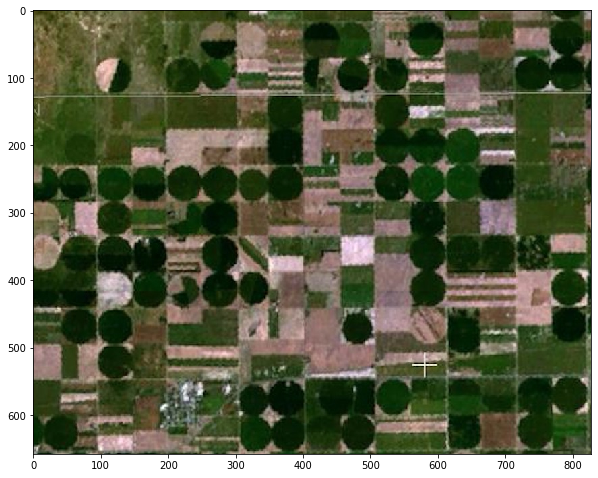

In [11]:
img_farms = cv.imread('images/round_farms.jpg')

img_gray = cv.cvtColor(img_farms, cv.COLOR_BGR2GRAY)
#img_gray = np.float32(img_gray)

img_rgb = cv.cvtColor(img_farms, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 9))
plt.imshow(img_rgb)
plt.show()

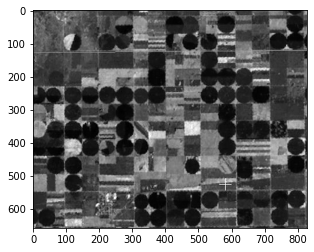

In [82]:
img_blur = cv.GaussianBlur(img_gray, (5, 5), sigmaX=0)

plt.imshow(img_blur, cmap='gray')
plt.show()

## HoughCircles function
HoughCircles takes in a few things as its arguments:

- an input image, detection method (Hough gradient), resolution factor between the detection and image,
- minDist - the minimum distance between circles
- param1 - the higher value for performing Canny edge detection
- param2 - threshold for circle detection, a smaller value --> more circles will be detected
- min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

81 Circles shape detected


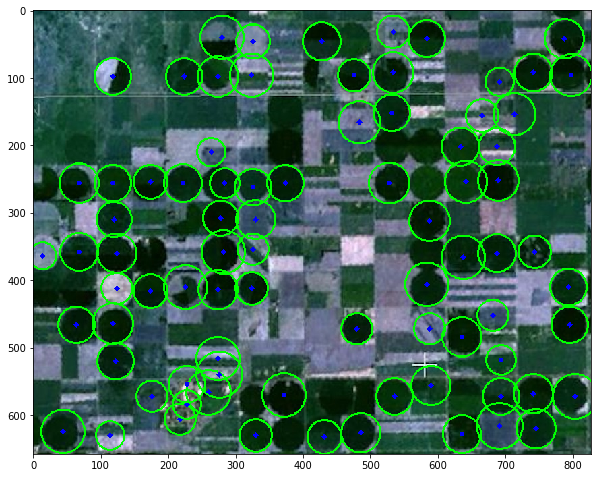

In [89]:
img_circles = np.copy(img_farms)

circles = cv.HoughCircles(
    img_blur, 
    method=cv.HOUGH_GRADIENT, 
    dp=1, 
    minDist=25, 
    param1=70, 
    param2=16.5,
    minRadius=20,
    maxRadius=35,
)

if circles is not None:
    circles = np.uint16(np.around(circles)).reshape((-1, 3))
    print(f'{circles.shape[0]} Circles shape detected')

    for [x, y, r] in circles:
        cv.circle(img_circles, (x, y), r, (0, 255, 0), 2)
        cv.circle(img_circles, (x, y), 2, (0, 0, 255), 3)
    
plt.figure(figsize=(10, 9))
plt.imshow(img_circles)
plt.show()